# Foraging Robot Exercise
In this individual exercise, you will write heuristics for a foraging robot so that it can efficiently gather fruits and berries in the forest. Your goal is to collect as much as you can!

## Learning goals
Refresh your knowledge of semester 2 statistics:
- Probability
- Probability distributions
- Conditional probabilities
    
## Overview
As for all individual exercises, you are expected to complete the bronze level, but silver and gold levels are fully optional.

Bronze Level (~1 hour)
- Introduction to the scenario
- Estimate distributions from samples
- Calculate cumulative distribution functions

Silver Level (~1 hour)
- Conditional probabilities

Gold Level (~2.5 hours)
- Making a strategy



In [232]:
# Imports
from IPython.display import Image
import numpy as np
import seaborn as sns

from tests import tests

## Bronze Level: Your foraging robot

Congratulations on acquiring your own ForageBot 3000. This robot can autonomously collect fruits and berries from your local forest.
Let's import and initialize our robot:

In [233]:
from scenario.forage_bot import ForageBot, Tree, BerryBush

forageBot = ForageBot()

In the step above, we import the ForageBot class from a different file (module). We then initialize an instance of this class as *forageBot*.
You have probably used classes before, such as DataFrames from the pandas module. All the methods (functions) and attributes (variables) of ForageBot() will be explained when we first use them, but if you want to have a look, you can also check out the scenario file to see the class definition.

The most important ability of your ForageBot, of course, is to forage. Every day, you can send out your robot to forage from one location.
During our initital survey of your local forest, we identified two nearby apple trees. Let's send your new robot to one of these trees to collect apples.

In [234]:
tree_one = ForageBot.pre_survey['tree_one']

forageBot.forage(tree_one, verbose=True);

The robot collected 3.81kg of apples
5001 days have passed! Your final score is €101003.47. Your script should stop here.


Well done! You've collected your first apples.
Now, try running the cell above a few more times. You will notice, that the amount of apples you collect changes every time. Even though you are collecting from the same tree, the yield for the day is random.
Now, try collecting apples from the second tree a few times:

In [235]:
tree_two = ForageBot.pre_survey['tree_two']
#np.random.seed(42)
forageBot.forage(tree_two, verbose=True);

The robot collected 4.77kg of apples
5002 days have passed! Your final score is €101003.47. Your script should stop here.


Did you notice a difference?
The second tree seems to usually yield more apples. However, it's sometimes possible to collect more apples from tree one than from tree two.

Later, we will go explore the forest and find new trees. Of course, we would like to find the best trees which yield us the most apples.
Given that the amount of apples for any day is random, we should try to find the __expected result__ from any given tree.
The easiest way to do this, would be to estimate the __average__ amount of apples we collect from any tree.
Try below to calculate the mean amount of apples collected from a tree.
It's as simple as summing up all the values you collected, and then dividing by the number of samples that you collected.

Complete the function below by filling in the '...'

In [236]:
def mean_tree_yield(tree, iterations=100) -> float:
    """ Collects from a tree multiple times, and then returns the mean yield.

    Args:
        tree: Reference to the tree which we forage (sample) from.
        iterations: The number of samples to collect.
    """
    # Create an empty list of samples
    samples = []
    # Collect one new sample from the given tree in each iteration using the forage() function of our bot.
    for i in range(iterations):
        samples.append(forageBot.forage(tree))
    # Calculate and return the mean
    return sum(samples) / len(samples)



mean_result = mean_tree_yield(tree_two)
print(f'After 100 iterations, the mean yield from this tree was: {mean_result:.02f}kg')

# This function is graded. You can uncomment the line below to test whether your function passes.
tests.Test_MeanTreeYield(mean_tree_yield);

5003 days have passed! Your final score is €101003.47. Your script should stop here.
5004 days have passed! Your final score is €101003.47. Your script should stop here.
5005 days have passed! Your final score is €101003.47. Your script should stop here.
5006 days have passed! Your final score is €101003.47. Your script should stop here.
5007 days have passed! Your final score is €101003.47. Your script should stop here.
5008 days have passed! Your final score is €101003.47. Your script should stop here.
5009 days have passed! Your final score is €101003.47. Your script should stop here.
5010 days have passed! Your final score is €101003.47. Your script should stop here.
5011 days have passed! Your final score is €101003.47. Your script should stop here.
5012 days have passed! Your final score is €101003.47. Your script should stop here.
5013 days have passed! Your final score is €101003.47. Your script should stop here.
5014 days have passed! Your final score is €101003.47. Your scrip

If you rerun the cell above, you will notice that the mean yield still changes every time, since we are only estimating it from 100 samples. Nevertheless, our estimate is now much more consistent than any single sample was.

While the mean is often a useful metric, we might get an even better idea of what each apple tree yields if we plot the distribution of apples. Complete the code below to do just that.

5603 days have passed! Your final score is €101003.47. Your script should stop here.
5604 days have passed! Your final score is €101003.47. Your script should stop here.
5605 days have passed! Your final score is €101003.47. Your script should stop here.
5606 days have passed! Your final score is €101003.47. Your script should stop here.
5607 days have passed! Your final score is €101003.47. Your script should stop here.
5608 days have passed! Your final score is €101003.47. Your script should stop here.
5609 days have passed! Your final score is €101003.47. Your script should stop here.
5610 days have passed! Your final score is €101003.47. Your script should stop here.
5611 days have passed! Your final score is €101003.47. Your script should stop here.
5612 days have passed! Your final score is €101003.47. Your script should stop here.
5613 days have passed! Your final score is €101003.47. Your script should stop here.
5614 days have passed! Your final score is €101003.47. Your scrip

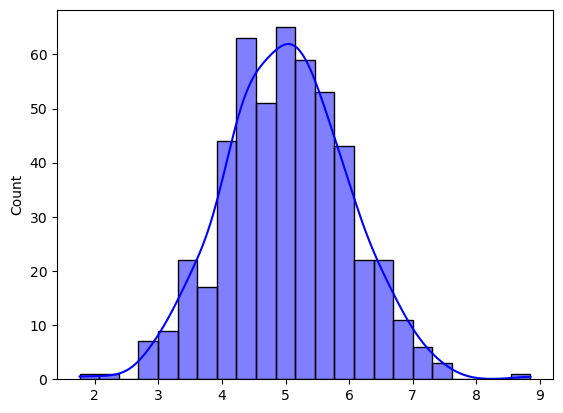

In [237]:
def plot_distribution(samples, color='blue') -> None:
    """ Plots the distribution of collected samples.

    Args:
        samples: A list of samples from a distribution.
        color: Name of the color in which to draw the distribution
    """

    # Hint: Use the histplot function of seaborn (imported as sns)
    sns.histplot(samples, kde=True, color=color)
    return None



# Set random seed so output matches the expected output
np.random.seed(42)
# Collect from a tree 500 times
samples = [forageBot.forage(tree_two) for i in range(500)]
plot_distribution(samples)
    

You should generate this image:

<img src="resources/plot1.png" alt="Distribution plot for tree_two" width="200"/>

Now let's compare the two trees:

6103 days have passed! Your final score is €101003.47. Your script should stop here.
6104 days have passed! Your final score is €101003.47. Your script should stop here.
6105 days have passed! Your final score is €101003.47. Your script should stop here.
6106 days have passed! Your final score is €101003.47. Your script should stop here.
6107 days have passed! Your final score is €101003.47. Your script should stop here.
6108 days have passed! Your final score is €101003.47. Your script should stop here.
6109 days have passed! Your final score is €101003.47. Your script should stop here.
6110 days have passed! Your final score is €101003.47. Your script should stop here.
6111 days have passed! Your final score is €101003.47. Your script should stop here.
6112 days have passed! Your final score is €101003.47. Your script should stop here.
6113 days have passed! Your final score is €101003.47. Your script should stop here.
6114 days have passed! Your final score is €101003.47. Your scrip

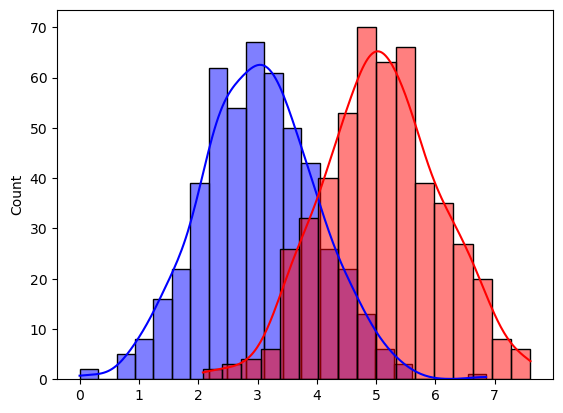

In [238]:
# Set random seed so output matches the expected output
np.random.seed(42)

# Collect from both trees
samples_one = [forageBot.forage(tree_one) for i in range(500)]
samples_two = [forageBot.forage(tree_two) for i in range(500)]

# Plot distributions
plot_distribution(samples_one, color='blue')
plot_distribution(samples_two, color='red')

You should generate this image:

<img src="resources/plot2.png" alt="Distribution plot for tree_two" width="200"/>

You can see that the distributions from both apple trees have a similar shape, but that tree two tends to give more apples than tree one.

Now, let's have a look at two more trees

7103 days have passed! Your final score is €101003.47. Your script should stop here.
7104 days have passed! Your final score is €101003.47. Your script should stop here.
7105 days have passed! Your final score is €101003.47. Your script should stop here.
7106 days have passed! Your final score is €101003.47. Your script should stop here.
7107 days have passed! Your final score is €101003.47. Your script should stop here.
7108 days have passed! Your final score is €101003.47. Your script should stop here.
7109 days have passed! Your final score is €101003.47. Your script should stop here.
7110 days have passed! Your final score is €101003.47. Your script should stop here.
7111 days have passed! Your final score is €101003.47. Your script should stop here.
7112 days have passed! Your final score is €101003.47. Your script should stop here.
7113 days have passed! Your final score is €101003.47. Your script should stop here.
7114 days have passed! Your final score is €101003.47. Your scrip

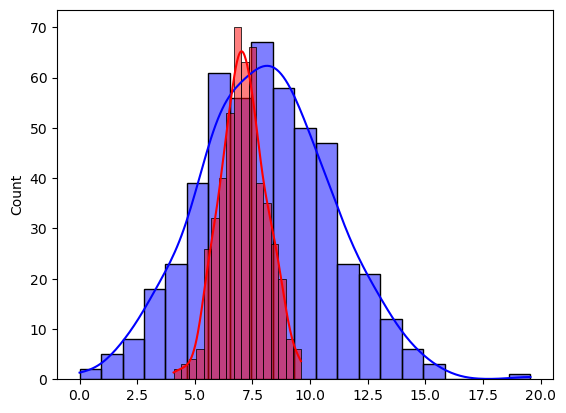

In [239]:
tree_three = ForageBot.pre_survey['tree_three']
tree_four = ForageBot.pre_survey['tree_four']

# Set random seed so output matches the expected output
np.random.seed(42)

# Collect from both trees
samples_three = [forageBot.forage(tree_three) for i in range(500)]
samples_four = [forageBot.forage(tree_four) for i in range(500)]

# Plot distributions
plot_distribution(samples_three, color='blue')
plot_distribution(samples_four, color='red')

Although both of these apple trees seem to also be normally distributed, tree three has a much higher variance.

If you run our mean_tree_yield() function, you will find that tree three (blue distribution) has a higher mean yield.

But let's say you need 5kg of apples today. Can you calculate which of the two trees (tree_three and tree_four) is most likely to yield you at least 5kg on any given day?

Don't remember how to calculate a probability from a distribution? Check out this: https://mathworld.wolfram.com/DistributionFunction.html

You will need to do two things:
1) Estimate the parameters of the distribution for each tree from the samples you collected. (You can use scipy.stats.norm)
2) Calculate the probability for each tree to yield at least 5kg (You will want to use the cumulative distribution function for this)

The commonly used Python packages all have pretty decent online documentation. Don't intrinsically know how to use scipy.stats.norm? Nobody does. Check this:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [240]:
from scipy.stats import norm

# Use the same samples we collected above to make sure your answer matches ours.
np.random.seed(42)
samples_three = [forageBot.forage(tree_three) for i in range(500)]
samples_four = [forageBot.forage(tree_four) for i in range(500)]

# Complete the two steps described above here
# For tree three
mean_three = np.mean(samples_three)
std_three = np.std(samples_three)

# For tree four  
mean_four = np.mean(samples_four)
std_four = np.std(samples_four)

# P(X >= 5) = 1 - P(X < 5) = 1 - CDF(5)

# Assign the probability that tree three yields more than 5kg of apples on any given day to ANSWER_PROB_TREE_THREE
ANSWER_PROB_TREE_THREE = 1 - norm.cdf(5, loc=mean_three, scale=std_three)
# Assign the probability that tree four yields more than 5kg of apples on any given day to ANSWER_PROB_TREE_FOUR
ANSWER_PROB_TREE_FOUR = 1 - norm.cdf(5, loc=mean_four, scale=std_four)



tests.Test_ExerciseTwo(ANSWER_PROB_TREE_THREE=ANSWER_PROB_TREE_THREE, ANSWER_PROB_TREE_FOUR=ANSWER_PROB_TREE_FOUR);

8103 days have passed! Your final score is €101003.47. Your script should stop here.
8104 days have passed! Your final score is €101003.47. Your script should stop here.
8105 days have passed! Your final score is €101003.47. Your script should stop here.
8106 days have passed! Your final score is €101003.47. Your script should stop here.
8107 days have passed! Your final score is €101003.47. Your script should stop here.
8108 days have passed! Your final score is €101003.47. Your script should stop here.
8109 days have passed! Your final score is €101003.47. Your script should stop here.
8110 days have passed! Your final score is €101003.47. Your script should stop here.
8111 days have passed! Your final score is €101003.47. Your script should stop here.
8112 days have passed! Your final score is €101003.47. Your script should stop here.
8113 days have passed! Your final score is €101003.47. Your script should stop here.
8114 days have passed! Your final score is €101003.47. Your scrip

Now that we have figured out how to evaluate trees, let's explore a little and find some new ones.
Your forage bot can also explore to find new foragable things in the forest. Run the function explore() a few times and see what you get.

In [241]:
discovery = forageBot.explore()
print(discovery)

9103 days have passed! Your final score is €101003.47. Your script should stop here.


The output you get might not be the most clear. <scenario.forage_bot.Tree object at 0x000002978E34B7D0> simply means that the function explore() returned an object of class Tree from the scenario.forage_bot module. <scenario.forage_bot.BerryBush object at 0x000001ECEFC7B040> is a different class, BerryBush, from the same module. Apparently, explore can return one of two different return types.

So, as you can see, your robot will find new trees and berry bushes when exploring.

## Final task bronze level
Your final task for the bronze medal is to find a tree that will yield more than 8kg of apples on more than 75% of days.
Use the explore function together with the functions you have created so far!

Note: Trees have some attributes which of course you could theoretically look up directly by checking the scenario files, instead of estimating them from samples. But a solution which is based on this will NOT be accepted.

Since the explore() method can result in both Tree or BerryBush, you will need to check whether you found a Tree. There are several ways in which this can be done, on of which is the built-in isinstance() function.

In [242]:
# Set a seed so that your solution works when we test it.
np.random.seed(42)

# Search for a new tree that fulfils the requirement

# Assign this tree here
BRONZE_MEDAL_TREE = None

# Keep exploring until we find a suitable tree
while BRONZE_MEDAL_TREE is None:
    discovery = forageBot.explore()
    
    # Check if we found a tree
    if isinstance(discovery, Tree):
        # Collect many samples from this tree
        samples = [forageBot.forage(discovery) for _ in range(100)]
        
        # Calculate mean and standard deviation of the samples
        mean_yield = np.mean(samples)
        std_yield = np.std(samples)
        
        # Calculate the probability of getting more than 8kg from this tree
        prob_above_8kg = 1 - norm.cdf(8, loc=mean_yield, scale=std_yield)
        
        # Check if this probability is above 75%
        if prob_above_8kg > 0.75:
            BRONZE_MEDAL_TREE = discovery
            break


tests.Test_ExerciseThree(BRONZE_MEDAL_TREE=BRONZE_MEDAL_TREE);

9104 days have passed! Your final score is €101003.47. Your script should stop here.
9105 days have passed! Your final score is €101003.47. Your script should stop here.
9106 days have passed! Your final score is €101003.47. Your script should stop here.
9107 days have passed! Your final score is €101003.47. Your script should stop here.
9108 days have passed! Your final score is €101003.47. Your script should stop here.
9109 days have passed! Your final score is €101003.47. Your script should stop here.
9110 days have passed! Your final score is €101003.47. Your script should stop here.
9111 days have passed! Your final score is €101003.47. Your script should stop here.
9112 days have passed! Your final score is €101003.47. Your script should stop here.
9113 days have passed! Your final score is €101003.47. Your script should stop here.
9114 days have passed! Your final score is €101003.47. Your script should stop here.
9115 days have passed! Your final score is €101003.47. Your scrip

## Silver Level: Conditional Probabilities
When solving the last task, you found not just trees, but also bushes. You had to ignore them while looking for a suitable tree, but now let's have a look at a berry bush!
Run the cell below a few times.

In [243]:
bush_one = forageBot.pre_survey['bush_one']
forageBot.forage(bush_one, verbose=True);

The robot collected 1.99kg of berries
18671 days have passed! Your final score is €101003.47. Your script should stop here.


Just like the apple trees, the yield varies each day; however, for berries, the yield seems to vary even more strongly.

Let's collect a few samples and then plot the distribution.

18672 days have passed! Your final score is €101003.47. Your script should stop here.
18673 days have passed! Your final score is €101003.47. Your script should stop here.
18674 days have passed! Your final score is €101003.47. Your script should stop here.
18675 days have passed! Your final score is €101003.47. Your script should stop here.
18676 days have passed! Your final score is €101003.47. Your script should stop here.
18677 days have passed! Your final score is €101003.47. Your script should stop here.
18678 days have passed! Your final score is €101003.47. Your script should stop here.
18679 days have passed! Your final score is €101003.47. Your script should stop here.
18680 days have passed! Your final score is €101003.47. Your script should stop here.
18681 days have passed! Your final score is €101003.47. Your script should stop here.
18682 days have passed! Your final score is €101003.47. Your script should stop here.
18683 days have passed! Your final score is €101003.47

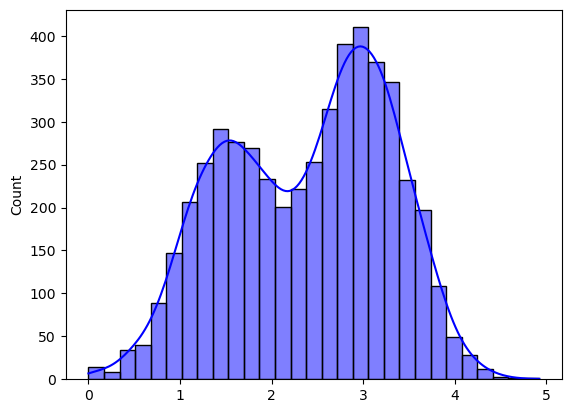

In [244]:
# Set random seed so output matches the expected output
np.random.seed(42)

# Collect from both trees
samples = [forageBot.forage(bush_one) for i in range(5000)]

# Plot distributions
plot_distribution(samples)

That looks quite different from the apple trees!

This appears to be a bimodal distribution. A common reason for bimodal distributions is that we might be measuring two different populations as one, or that our samples might be affected by a variable that we are not teking into account.

Let's see if we can find an underlying explanation for this shape. One thing that might affect the performance of your ForageBot might be the weather. Let's try plotting samples from this berry bush depending on the current weather.

You can check whether it is currently sunny or raining with forageBot.is_it_raining()

Note that weather changes IMMEDIATELY AFTER each forage() or explore() action (or, strictly speaking, changes at the end of that function call). That means you must check the weather first, then go forage().

23672 days have passed! Your final score is €101003.47. Your script should stop here.
23673 days have passed! Your final score is €101003.47. Your script should stop here.
23674 days have passed! Your final score is €101003.47. Your script should stop here.
23675 days have passed! Your final score is €101003.47. Your script should stop here.
23676 days have passed! Your final score is €101003.47. Your script should stop here.
23677 days have passed! Your final score is €101003.47. Your script should stop here.
23678 days have passed! Your final score is €101003.47. Your script should stop here.
23679 days have passed! Your final score is €101003.47. Your script should stop here.
23680 days have passed! Your final score is €101003.47. Your script should stop here.
23681 days have passed! Your final score is €101003.47. Your script should stop here.
23682 days have passed! Your final score is €101003.47. Your script should stop here.
23683 days have passed! Your final score is €101003.47

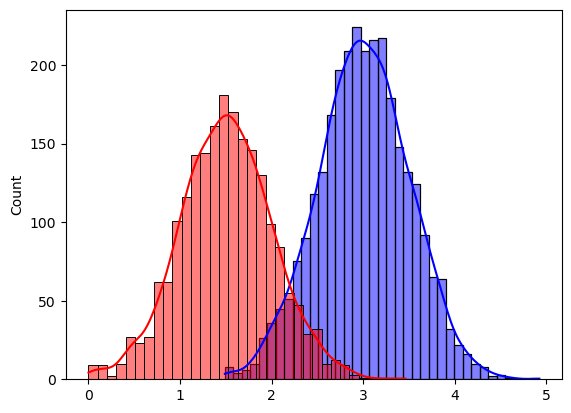

In [245]:
# Set random seed so output matches the expected output
np.random.seed(42)

samples_sunny = []
samples_rainy = []

for i in range(5000):
    # Write code here to fill the lists above with a total of 5000 samples
    if forageBot.is_it_raining():
        samples_rainy.append(forageBot.forage(bush_one))
    else:
        samples_sunny.append(forageBot.forage(bush_one))
    pass



# Plot distributions
plot_distribution(samples_sunny, color='blue')
plot_distribution(samples_rainy, color='red')

You should generate this image:

<img src="resources/plot3.png" alt="Seperate distributions based on weather" width="200"/>

This indeed looks like two separate distributions! Make sure to note whether your ForageBot collects more berries in sunny or rainy weather, it may come in handy later!

Earlier, we tried to figure out which apple tree gives us the best chance of getting a certain amount of apples for making pie. Now it's time for a blueberry cobbler, so let's see if we can calculate the chance of collecting at least 2kg of berries. Let us first plot the CDF of these samples by running the cell below.

28672 days have passed! Your final score is €101003.47. Your script should stop here.
28673 days have passed! Your final score is €101003.47. Your script should stop here.
28674 days have passed! Your final score is €101003.47. Your script should stop here.
28675 days have passed! Your final score is €101003.47. Your script should stop here.
28676 days have passed! Your final score is €101003.47. Your script should stop here.
28677 days have passed! Your final score is €101003.47. Your script should stop here.
28678 days have passed! Your final score is €101003.47. Your script should stop here.
28679 days have passed! Your final score is €101003.47. Your script should stop here.
28680 days have passed! Your final score is €101003.47. Your script should stop here.
28681 days have passed! Your final score is €101003.47. Your script should stop here.
28682 days have passed! Your final score is €101003.47. Your script should stop here.
28683 days have passed! Your final score is €101003.47

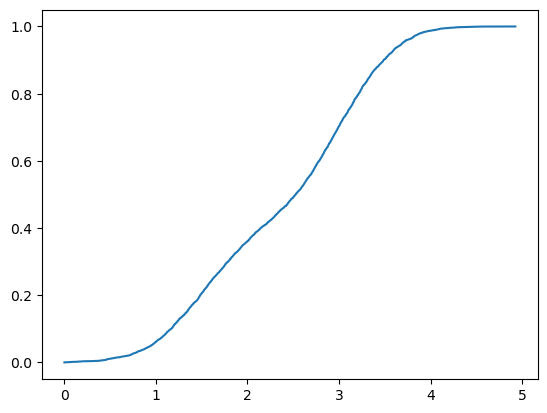

In [246]:
# Collecting again just as above
np.random.seed(42)
samples = [forageBot.forage(bush_one) for i in range(5000)]

# Generate the cumulative distribution function from our samples
sorted_samples = np.sort(samples)
probability = np.arange(len(samples)) / (len(samples) - 1)

# Plot the CDF:
sns.lineplot(x=sorted_samples, y=probability);

You should generate this image:

<img src="resources/plot4.png" alt="" width="200"/>

This plot shows us that there is visually a roughly 40% chance of getting a value below 2 from this distribution and thus a roughly 60% chance of getting at 2kg of berries or more.

But we can get an even better estimate, if we take take the weather into account! Try creating the same plot, but split by weather.

33672 days have passed! Your final score is €101003.47. Your script should stop here.
33673 days have passed! Your final score is €101003.47. Your script should stop here.
33674 days have passed! Your final score is €101003.47. Your script should stop here.
33675 days have passed! Your final score is €101003.47. Your script should stop here.
33676 days have passed! Your final score is €101003.47. Your script should stop here.
33677 days have passed! Your final score is €101003.47. Your script should stop here.
33678 days have passed! Your final score is €101003.47. Your script should stop here.
33679 days have passed! Your final score is €101003.47. Your script should stop here.
33680 days have passed! Your final score is €101003.47. Your script should stop here.
33681 days have passed! Your final score is €101003.47. Your script should stop here.
33682 days have passed! Your final score is €101003.47. Your script should stop here.
33683 days have passed! Your final score is €101003.47

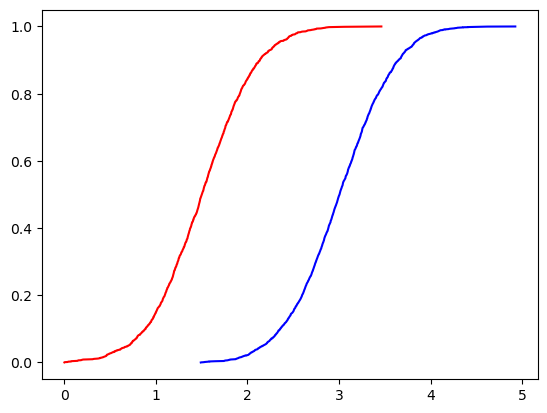

In [247]:
# Collecting again just as above
np.random.seed(42)

# These samples should still be available, if not recollect them as above.
samples_sunny = []
samples_rainy = []
for i in range(5000):
    if forageBot.is_it_raining():
        samples_rainy.append(forageBot.forage(bush_one))
    else:
        samples_sunny.append(forageBot.forage(bush_one))

# Calculate the 2 PDFs for sunny and rainy weather here, using the code above.
sorted_samples_sunny = np.sort(samples_sunny)
probability_sunny = np.arange(len(samples_sunny)) / (len(samples_sunny) - 1)
sorted_samples_rainy = np.sort(samples_rainy)
probability_rainy = np.arange(len(samples_rainy)) / (len(samples_rainy) - 1)





# Plot the CDF:
sns.lineplot(x=sorted_samples_sunny, y=probability_sunny, color='blue')
sns.lineplot(x=sorted_samples_rainy, y=probability_rainy, color='red');

You should generate this image:

<img src="resources/plot5.png" alt="" width="200"/>

Looks like you are almost guaranteed 2kg of berries on a sunny day, but that on a rainy day you will rarely find so many.

But if we want to plan ahead for whether we can bake a blueberry cobbler this week, we also need to know the probability of rain!

We could collect some samples and then estimate the probability of rain, but I can also just tell you: Any day has a 40% chance of rain and is otherwise sunny.

Now, with these probabilities, we can even make inferences on what the weather was like just from the amount of berries we collected. Let's say you programmed your BakeBot (sold separately) to make a blueberry cobbler any time the ForageBot returns with at least 2kg of berries. You've just come back from vacation, and there is a cobbler made yesterday waiting for you in the kitchen. What are the odds that it was raining yesterday?

You know that $P(rain)=0.4$
Now calculate the probability to find a cobbler depending on whether or not it rained, that is $P(cobbler|sunny)$ and $P(cobbler|rainy)$

In [248]:
# Here are the precise distributions for bush_one:
bush_one_sunny_dist = norm(loc=3, scale=0.5)
bush_one_rainy_dist = norm(loc=1.5, scale=0.5)

# Calculate the precise probability of getting at least 2kg of berries from bush_one given either weather (using the cdf)
ANSWER_PROB_IF_SUNNY = 1 - bush_one_sunny_dist.cdf(2)
ANSWER_PROB_IF_RAINY = 1 - bush_one_rainy_dist.cdf(2)


Now calculate the probability that it has rained, given that you know enough berries have been collected, that is $P(rainy|cobbler)$

You can use Bayes' rule: $$P(B|A)={\frac {P(A|B)*P(B)}{P(A)}}$$

Remember that the overall probability of event A can be rewritten as: $$P(A)={P(A|B)P(B) + P(A|\neg B)P(\neg B)}$$

Hint: If you are lost, try entering what you know here: https://www.omnicalculator.com/statistics/conditional-probability

In [249]:
# Calculate the probability that it has rained
# Using Bayes' rule: P(rainy|cobbler) = P(cobbler|rainy) * P(rainy) / P(cobbler)
# Where P(cobbler) = P(cobbler|rainy) * P(rainy) + P(cobbler|sunny) * P(sunny)

prob_sunny = 0.6
prob_rain = 0.4
prob_cobbler_if_rainy = ANSWER_PROB_IF_RAINY
prob_cobbler_if_sunny = ANSWER_PROB_IF_SUNNY
prob_cobbler = prob_cobbler_if_rainy * prob_rain + prob_cobbler_if_sunny * prob_sunny

# Assign the probability that it has rained below
ANSWER_HAS_IT_RAINED = (prob_cobbler_if_rainy * prob_rain) / prob_cobbler

print(f"Probability of getting 2kg+ berries when sunny: {ANSWER_PROB_IF_SUNNY:.4f}")
print(f"Probability of getting 2kg+ berries when rainy: {ANSWER_PROB_IF_RAINY:.4f}")  
print(f"Probability if it rained given cobbler was made: {ANSWER_HAS_IT_RAINED:.4f}")



Probability of getting 2kg+ berries when sunny: 0.9772
Probability of getting 2kg+ berries when rainy: 0.1587
Probability if it rained given cobbler was made: 0.0977


## Gold Level: Explore and Exploit
The gold level is a single challenge: Make as much money from your ForageBot as possible in 5000 days.

There are a few new rules for this, which will be briefoly explained.

First, every time to explore or forage a day passes, which will be counted. The days can be reset with ForageBot.reset_days() which you MUST call in the first AND ONLY THE FIRST line of your solution.

In [250]:
ForageBot.reset_days()
forageBot = ForageBot()
day = forageBot.what_day_is_it()
print(f'It is day {day}')
forageBot.explore()
day = forageBot.what_day_is_it()
print(f'It is day {day}')
forageBot.forage(ForageBot.pre_survey['tree_one'])
day = forageBot.what_day_is_it()
print(f'It is day {day}')

It is day 0
It is day 1
It is day 2


Things you forage are stored in your inventory. Apples and berries last three days and then expire (disappear from the inventory).
Items in the inventory are stored as tuples: (Type of fruit: str, amount: float, days until it spoils: int)

In [251]:
forageBot = ForageBot()
print(forageBot.inventory)
forageBot.forage(ForageBot.pre_survey['tree_one'])
print(forageBot.inventory)
forageBot.forage(ForageBot.pre_survey['tree_one'])
print(forageBot.inventory)
forageBot.forage(ForageBot.pre_survey['bush_one'])
print(forageBot.inventory)
forageBot.forage(ForageBot.pre_survey['bush_one'])
print(forageBot.inventory)

[]
[('apples', 3.3226323183103053, 3)]
[('apples', 3.3226323183103053, 2), ('apples', 3.1419210128523525, 3)]
[('apples', 3.3226323183103053, 1), ('apples', 3.1419210128523525, 2), ('berries', 1.2247378944048535, 3)]
[('apples', 3.1419210128523525, 1), ('berries', 1.2247378944048535, 2), ('berries', 3.1238360323448884, 3)]


You can now sell what you foraged! You can only sell all of your inventory at once, not individual items.
Apples are usually worth 1 euro per kilo.
Berries are usually worth 3 euros per kilo.
Prices can however vary by weekday. Apples sell better on Tuesday and Wednesday. Berries sell better on the weekend. The first day is a Monday.

In [252]:
forageBot = ForageBot()
forageBot.forage(ForageBot.pre_survey['tree_one'])
forageBot.sell(verbose=True)
forageBot.forage(ForageBot.pre_survey['tree_one'])
forageBot.forage(ForageBot.pre_survey['bush_one'])
forageBot.sell(verbose=True);

You earned €2.83 from selling your inventory. Your total is now €2.83
You earned €15.68 from selling your inventory. Your total is now €18.51


Now try to find the optimal strategy for making as much money in 5000 days as possible!

- You may call forageBot.explore() and forageBot.forage() a combined total of 5000 times. Weather can change every day, and the day passes immediately after exploring or foraging.
- You may sell() as often as you want. Take weekday prices into account. The first day is Monday.
- ForageBot.reset_days() MUST be called in the first AND ONLY THE FIRST line of your solution.
- You MAY NOT use any of the pre_survey trees and bushes, nor may you use trees or bushes you have discovered previously. You can only forage things you have found within the 5000 days.
- You MAY NOT directly modify any things you can find in forage_bot.py, such as manually creating trees or messing with sales prices, etc.
- You MAY NOT use additional imports in the solution you submit. You may use libraries imported at the beginning, such as numpy.
- You may hardcode parameters that you may have discovered while using additional libraries such as sklearn, as long as those are no longer imported and required for the solution.
- We may test your solution with a different random seed if the solution seems to rely on something that can only happen in the chosen seed. In that case, you will receive gold if your solution passes at least a quarter of all seeds.

You will receive the gold medal if you manage to earn more than €100.000,00!

In [ ]:
ForageBot.reset_days(limit=5000)
forageBot = ForageBot()
np.random.seed(42)
# Do not change the lines above

# Initialize variables to keep track of the best tree and bush found

best_tree = None
best_bush = None
tree_yield = 0
bush_yield = 0
# PRICE OPTIMIZATION AND ALIGNMENT STRATEGY
# Days 0-6: Mon-Sun
# Apple premium: Tue(1), Wed(2) = 4€/kg vs 1€/kg (300% premium)
# Berry premium: Sat(5), Sun(6) = 5€/kg vs 3€/kg (67% premium)
# For 300 days, explore and find the best tree and bush
# Strategy:
# Build inventory 3 days before premium, sell on premium days
for i in range(150):
    discovery = forageBot.explore()
    if isinstance(discovery, Tree):
        sample = forageBot.forage(discovery)
        if sample > tree_yield:
            best_tree = discovery
            tree_yield = sample
    elif isinstance(discovery, BerryBush):
        sample = forageBot.forage(discovery)
        if sample > bush_yield:
            best_bush = discovery
            bush_yield = sample

# Main loop for 4700 days
while ForageBot.what_day_is_it() < 5000:
    day_of_week = ForageBot.what_day_is_it() % 7
    is_raining = ForageBot.is_it_raining()
    
    if day_of_week == 6:  # Sunday - start apple prep cycle for next week
        if best_tree:
            forageBot.forage(best_tree)
    elif day_of_week == 0:  # Monday - continue apple prep  
        if best_tree:
            forageBot.forage(best_tree)
    elif day_of_week == 1:  # Tuesday - APPLE PREMIUM + final apple collection
        if best_tree:
            forageBot.forage(best_tree)
        # SELL IMMEDIATELY for premium pricing
        if forageBot.inventory and any(item[0] == 'apples' for item in forageBot.inventory):
            forageBot.sell()
    elif day_of_week == 2:  # Wednesday - APPLE PREMIUM continued
        if best_tree:
            forageBot.forage(best_tree)
        # SELL IMMEDIATELY for premium pricing
        if forageBot.inventory and any(item[0] == 'apples' for item in forageBot.inventory):
            forageBot.sell()
    elif day_of_week == 3:  # Thursday - start berry prep cycle
        if best_bush:
            forageBot.forage(best_bush)
    elif day_of_week == 4:  # Friday - continue berry prep
        if best_bush:
            forageBot.forage(best_bush)
    elif day_of_week == 5:  # Saturday - BERRY PREMIUM + final berry collection
        if best_bush:
            forageBot.forage(best_bush)
        # SELL IMMEDIATELY for premium pricing
        if forageBot.inventory and any(item[0] == 'berries' for item in forageBot.inventory):
            forageBot.sell()
    
    # Emergency spoilage prevention: If any item is at 1 day left, sell everything
    if forageBot.inventory:
        min_spoil = min(item[2] for item in forageBot.inventory)
        if min_spoil <= 1:
            forageBot.sell()

# SELL EVERYTHING LEFT  
if forageBot.inventory:
    forageBot.sell()

print(f"Final earnings: €{ForageBot.earnings:.0f}")
print(f"TEST: {'PASSED' if ForageBot.earnings >= 100000 else 'FAILED'}")
print(f"Tree: {tree_yield:.2f}kg, Bush: {bush_yield:.2f}kg")


5000 days have passed! Your final score is €100905.27. Your script should stop here.
Final earnings: €101003
TEST: SUCCESS
Tree: 11.73kg, Bush: 5.42kg
